In [1]:
import pandas as pd
import numpy as np
import bluebelt as blue

import random

In [2]:
nrows = 100
ncols = 6

np.random.seed(27)
series = pd.Series(np.random.weibull(7,nrows) * 100, index=pd.date_range(start='1-1-2020', periods=nrows), name='process A')
frame = pd.DataFrame(np.random.normal(loc=100, scale=20, size=ncols*nrows).reshape(nrows, ncols), index=pd.date_range(start='1-1-2020', periods=nrows), columns=[f'process {col}' for col in range(1, ncols+1)])

In [3]:
# break the series
breaks = series.shape[0] // 5
loc = list(np.arange(0+breaks, series.shape[0], breaks))
series.iloc[loc] = np.nan

# break the frame
ix = [(row, col) for row in range(frame.shape[0]) for col in range(frame.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    frame.iat[row, col] = np.nan
    
# add zeros
ix = [(row, col) for row in range(frame.shape[0]) for col in range(frame.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    frame.iat[row, col] = 0

In [7]:
series.blue.planning.effort(rule='iso_week')

Effort(n=100, inter=0.1847, intra=0.1080)

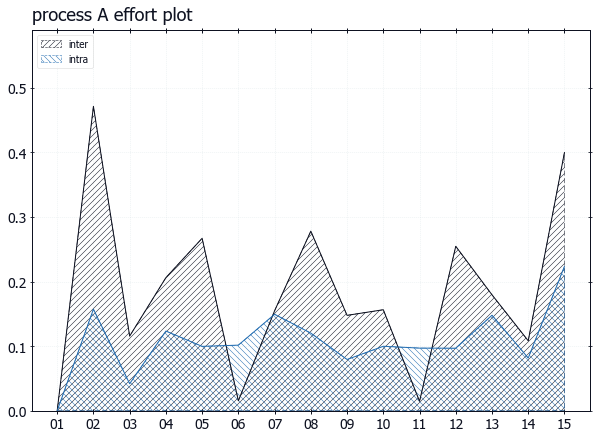

In [8]:
series.blue.planning.effort(rule='iso_week').plot()